# Tutorial 2, Example 1a

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

In [2]:
no_epochs = 200
lr = 0.01

SEED = 10
np.random.seed(SEED)

In [3]:
# Given training data
X = np.array([[0.09, -0.44, -0.15],
              [0.69, -0.99, -0.76],
              [0.34, 0.65, -0.73],
              [0.15, 0.78, -0.58],
              [-0.63, -0.78, -0.56],
              [0.96, 0.62, -0.66],
              [0.63, -0.45, -0.14],
              [0.88, 0.64, -0.33]])
Y = np.array([-2.57, -2.97, 0.96, 1.04, -3.21, 1.05, -2.39, 0.66])

# initialize the weights and biases
w = np.array([0.77, 0.02, 0.63])
b = 0.0

In [4]:
# class for a linear neuron
class Linear():
  def __init__(self):
    self.w = torch.tensor(w, dtype=torch.double)
    self.b = torch.tensor(b, dtype=torch.double)

  def __call__(self, x):
    return torch.inner(torch.tensor(x) ,self.w) + self.b

In [5]:
# squared error as the loss function
def loss(predicted_y, target_y):
  return torch.square(predicted_y - torch.tensor(target_y))

In [6]:
# funtion executing a training step
def train_step(model, x, d, learning_rate):
    y = model(x)
    loss_ = loss(y, d)
    grad_w = -(d - y)*x
    grad_b = -(d - y)
    model.w -= learning_rate * grad_w
    model.b -= learning_rate * grad_b

In [7]:
# create a linear neuron
model = Linear()
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

w: [0.77 0.02 0.63], b: 0.0


## SGD Training Starts

In [8]:
# keep an index for training
idx = np.arange(len(X))

err = []

# training via epochs
for epoch in range(no_epochs):
  np.random.shuffle(idx)
  X, Y = X[idx], Y[idx]
    
  err_ = []

  # go though individual patterns via each epoch
  for p in np.arange(len(X)):
    
    y_ = model(X[p])
    loss_ = loss(y_, Y[p])
    err_.append(loss_)
    
    train_step(model, X[p], Y[p], learning_rate=lr)
    
    if epoch == 0:
      print('epoch: {}'.format(epoch+1))
      print('p: {}'.format(p+1))
      print('x:{}, d:{}'.format(X[p], Y[p]))
      print('y: {}'.format(y_))
      print('se: {}'.format(loss_))
      print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
 
  err.append(np.mean(err_))
  if epoch%10 == 9:
        print('epoch: %3d, mse: %1.4f'%(epoch+1, err[epoch]))

C:\Users\snorl\AppData\Local\Temp\ipykernel_33740\3950607768.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  grad_w = -(d - y)*x


epoch: 1
p: 1
x:[ 0.34  0.65 -0.73], d:0.96
y: -0.18509999999999993
se: 1.3112540099999994
w: [0.77389334 0.02744315 0.62164077], b: 0.011450999999999998
epoch: 1
p: 2
x:[ 0.15  0.78 -0.58], d:1.04
y: -0.21161098859999997
se: 1.5665300667842692
w: [0.77577076 0.03720572 0.61438143], b: 0.023967109885999996
epoch: 1
p: 3
x:[ 0.63 -0.45 -0.14], d:-2.39
y: 0.40994671472298416
se: 7.839701605288032
w: [0.75813109 0.04980548 0.61830135], b: -0.004032357261229847
epoch: 1
p: 4
x:[ 0.88  0.64 -0.33], d:0.66
y: 0.4909590624007698
se: 0.028574838584426845
w: [0.75961865 0.05088734 0.61774352], b: -0.0023419478852375448
epoch: 1
p: 5
x:[ 0.09 -0.44 -0.15], d:-2.57
y: -0.04902822534065021
se: 6.35529868862911
w: [0.75734978 0.06197961 0.62152497], b: -0.02755166563183104
epoch: 1
p: 6
x:[-0.63 -0.78 -0.56], d:-3.21
y: -0.9010801099529876
se: 5.331111058654709
w: [0.77189597 0.07998919 0.63445493], b: -0.05064086453230116
epoch: 1
p: 7
x:[ 0.96  0.62 -0.66], d:1.05
y: 0.32123231587957535
se: 0.531

In [9]:
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
print('mse: %g'%err[-1])

w: [ 0.36871063  2.56587648 -0.21289879], b: -1.1664272930402482
mse: 0.0545477


## Plot learning curves

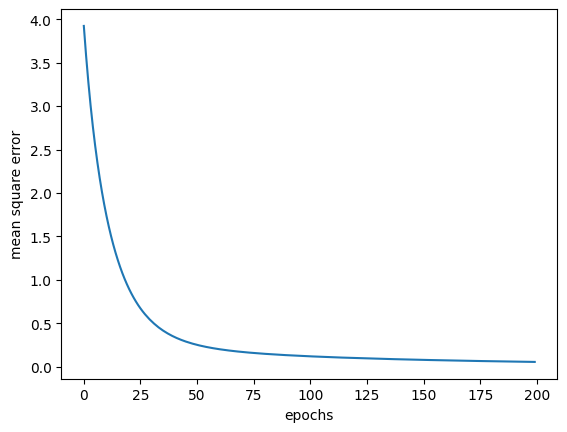

In [10]:
# plot learning curve
plt.figure(1)
plt.plot(range(no_epochs), err)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.show()

## Print predictions

In [11]:
# print predictions
for p in np.arange(len(X)):
    y_ = model(X[[p]])
    print('x: %s, d: %g, y: %g'%(X[p], Y[p], y_))


x: [-0.63 -0.78 -0.56], d: -3.21, y: -3.28088
x: [ 0.34  0.65 -0.73], d: 0.96, y: 0.78217
x: [ 0.96  0.62 -0.66], d: 1.05, y: 0.918892
x: [ 0.69 -0.99 -0.76], d: -2.97, y: -3.29043
x: [ 0.88  0.64 -0.33], d: 0.66, y: 0.870456
x: [ 0.15  0.78 -0.58], d: 1.04, y: 1.01374
x: [ 0.09 -0.44 -0.15], d: -2.57, y: -2.23029
x: [ 0.63 -0.45 -0.14], d: -2.39, y: -2.05898


## Practice - Model Construction

In [25]:
import torch 
import numpy as np
import matplotlib.pylab as plt

no_epochs = 200
lr = 0.01
SEED = 10
np.random.seed(SEED)

X = np.array([[0.09, -0.44, -0.15],
              [0.69, -0.99, -0.76],
              [0.34, 0.65, -0.73],
              [0.15, 0.78, -0.58],
              [-0.63, -0.78, -0.56],
              [0.96, 0.62, -0.66],
              [0.63, -0.45, -0.14],
              [0.88, 0.64, -0.33]])
Y = np.array([-2.57, -2.97, 0.96, 1.04, -3.21, 1.05, -2.39, 0.66])

w = np.array([0.77, 0.02, 0.63])
b = 0.0

class Linear:
    def __init__(self):
        self.w = torch.tensor(w, dtype=torch.double)
        self.b = torch.tensor(b, dtype=torch.double)
    def __call__(self, x):
        return torch.inner(self.w, torch.tensor(x)) + self.b

def loss(predicted_y, actual_y):
    return torch.square(predicted_y - torch.tensor(actual_y))

def train_steps(model, x, actual_y, lr):
    predicted_y = model(x)
    _loss = loss(actual_y, predicted_y)
    grad_w = - (actual_y - predicted_y) * x
    grad_b = - (actual_y - predicted_y)
    model.w -= grad_w * lr
    model.b -= grad_b * lr

model = Linear()
print("model.w: {}, model.b: {}".format(model.w.numpy(),model.b.numpy()))

model.w: [0.77 0.02 0.63], model.b: 0.0


In [26]:
idx = np.arange(len(X))
err = []

for i in range(no_epochs):
    np.random.shuffle(idx)
    X, Y = X[idx], Y[idx]

    _err = []
    
    for j in np.arange(len(X)):
        pred_y = model(X[j])
        _loss = loss(pred_y, Y[j])
        _err.append(_loss)
        
        train_steps(model,X[j], Y[j], lr)

    err.append(np.mean(_err))

print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
print('mse: %g'%err[-1])

C:\Users\snorl\AppData\Local\Temp\ipykernel_39312\2286312757.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.square(predicted_y - torch.tensor(actual_y))
C:\Users\snorl\AppData\Local\Temp\ipykernel_39312\2286312757.py:36: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  grad_w = - (actual_y - predicted_y) * x


w: [ 0.36871063  2.56587648 -0.21289879], b: -1.1664272930402482
mse: 0.0545477


[]

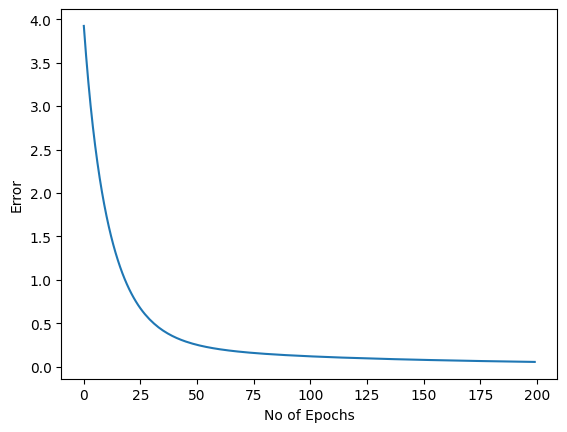

In [28]:
plt.figure(1)
plt.plot(np.arange(no_epochs), err)
plt.xlabel("No of Epochs")
plt.ylabel("Error")
plt.plot()

In [29]:
for p in np.arange(len(X)):
    pred_y = model(X[p])
    print("x: %s, y_pred: %g, y_actual: %g"%(X[p], pred_y, Y[p]))

x: [-0.63 -0.78 -0.56], y_pred: -3.28088, y_actual: -3.21
x: [ 0.34  0.65 -0.73], y_pred: 0.78217, y_actual: 0.96
x: [ 0.96  0.62 -0.66], y_pred: 0.918892, y_actual: 1.05
x: [ 0.69 -0.99 -0.76], y_pred: -3.29043, y_actual: -2.97
x: [ 0.88  0.64 -0.33], y_pred: 0.870456, y_actual: 0.66
x: [ 0.15  0.78 -0.58], y_pred: 1.01374, y_actual: 1.04
x: [ 0.09 -0.44 -0.15], y_pred: -2.23029, y_actual: -2.57
x: [ 0.63 -0.45 -0.14], y_pred: -2.05898, y_actual: -2.39
